In [9]:
# import
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

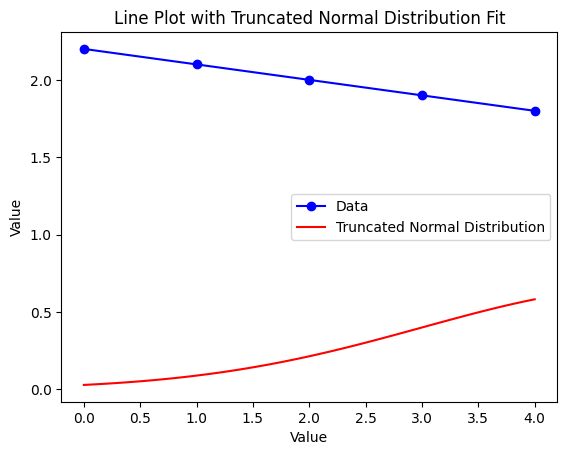

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# 假设你有一个截断正态分布的一小部分数据
x = np.array([0, 1, 2, 3, 4])
# y = np.array([1.2, 1.3, 1.6, 1.9, 2.2])
y = np.array([2.2, 2.1, 2.0, 1.9, 1.8])

# 指定截断范围的下限和上限
lower_limit = 0
upper_limit = 4

# 计算截断范围的标准分数
mean = 5
std = 2
lower_z = (lower_limit - mean) / std
upper_z = (upper_limit - mean) / std

# 拟合截断正态分布
truncated_distribution = truncnorm(lower_z, upper_z, loc=mean, scale=std)

# 生成横坐标
x_plot = np.linspace(lower_limit, upper_limit, 100)

# 绘制折线图
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Data')

# 绘制截断正态分布的拟合曲线
plt.plot(x_plot, truncated_distribution.pdf(x_plot), 'r-', label='Truncated Normal Distribution')

# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Value')
plt.title('Line Plot with Truncated Normal Distribution Fit')

# 添加图例
plt.legend()

# 显示图形
plt.show()

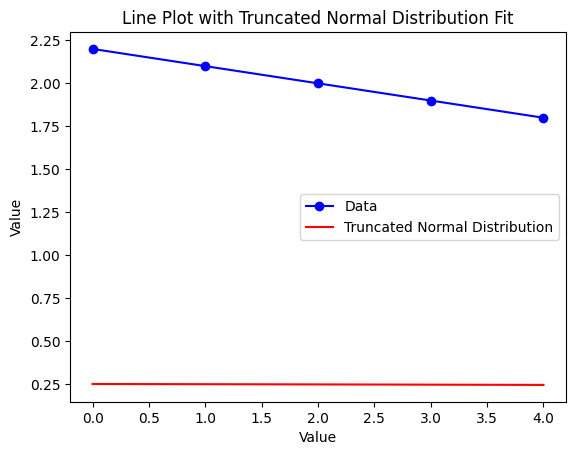

Best mean: -6.63585471145666
Best std: 40.22881359480744


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.optimize import minimize

# 假设你有一个截断正态分布的一小部分数据
x = np.array([0, 1, 2, 3, 4])
# y = np.array([1.2, 1.3, 3.0, 1.9, 2.2])
y = np.array([2.2, 2.1, 2.0, 1.9, 1.8])


# 定义误差函数
def error_function(params):
    mean, std = params
    # 指定截断范围的下限和上限
    lower_limit = 0
    upper_limit = 4
    
    # 计算截断范围的标准分数
    lower_z = (lower_limit - mean) / std
    upper_z = (upper_limit - mean) / std
    # 拟合截断正态分布
    truncated_distribution = truncnorm(lower_z, upper_z, loc=mean, scale=std)
    
    # 计算拟合曲线与原数据的误差
    y_predicted = truncated_distribution.pdf(x)
    error = np.sum((y_predicted - y)**2)
    
    return error

# 初始参数值
initial_params = [3, 2]

# 最小化误差函数
result = minimize(error_function, initial_params)

# 获取最优参数值
best_mean, best_std = result.x

# 拟合截断正态分布
lower_z = (0 - best_mean) / best_std
upper_z = (4 - best_mean) / best_std
truncated_distribution = truncnorm(lower_z, upper_z, loc=best_mean, scale=best_std)

# 生成横坐标
x_plot = np.linspace(0, 4, 100)

# 绘制折线图
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Data')

# 绘制截断正态分布的拟合曲线
plt.plot(x_plot, truncated_distribution.pdf(x_plot), 'r-', label='Truncated Normal Distribution')

# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Value')
plt.title('Line Plot with Truncated Normal Distribution Fit')

# 添加图例
plt.legend()

# 显示图形
plt.show()

print("Best mean:", best_mean)
print("Best std:", best_std)

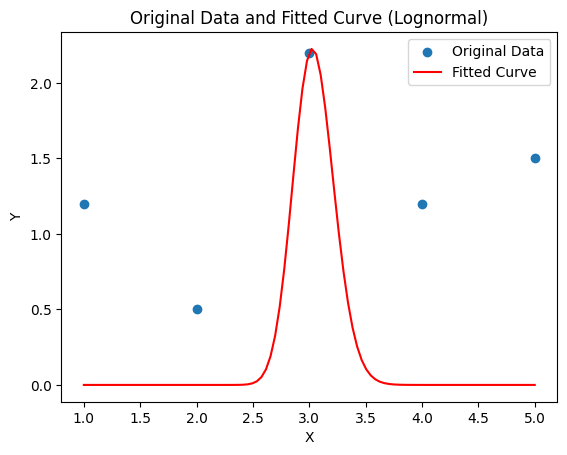

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 准备观测数据点的横坐标和纵坐标
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 0.5, 2.2, 1.2, 1.5])

# 定义对数正态分布函数和最小二乘法拟合
def lognormal(x, mu, sigma):
    return 1 / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu) ** 2 / (2 * sigma ** 2))

params, _ = curve_fit(lognormal, x, y)
mu_hat, sigma_hat = params

# 绘制原始数据散点图
plt.scatter(x, y, label='Original Data')

# 绘制拟合后的曲线
x_range = np.linspace(x.min(), x.max(), 100)  # 生成更密集的横坐标范围
y_fit = lognormal(x_range, mu_hat, sigma_hat)
plt.plot(x_range, y_fit, 'r-', label='Fitted Curve')

# 添加图例、坐标轴标签和标题
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Data and Fitted Curve (Lognormal)')

# 显示图形
plt.show()